# Polarização e análise de tweets

## Data Understanding

Importação do dataframe

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('tweets_eleicoes.csv')
colunas_tweets = df.columns
contas_partidos = ["PCP_PT","psocialista"]

Nome dos candidatos

In [107]:
df["candidate"].unique()

array(['André Ventura', 'Mariana Mortágua', 'Paulo Raimundo',
       'Rui Tavares', 'Luis Montenegro', 'Pedro Nuno Santos', 'Rui Rocha',
       'Inês de Sousa Real'], dtype=object)

In [108]:
round(df.describe(include='all'))

,id,user,text,datetime,time,replies,retweets,likes,bookmarks,views,query,candidate,date,hour,date_only
count,3.979000e+03,3952,3977,3979,3979,3979.0,3979.0,3979.0,3979.0,3979.0,3979,3979,3979,3979,3492
unique,NaN,2239,3939,3922,195,NaN,NaN,NaN,NaN,NaN,205,8,185,3782,185
top,NaN,Grok,Manifestação do CHEGA \n29/09/2024\n#pedroguer...,2025-04-04 23:34:57+00:00,11 de abr,NaN,NaN,NaN,NaN,NaN,CHEGA since:2025-03-29 until:2025-04-05 lang:pt,Pedro Nuno Santos,2025-04-04,19:09:09,2025-04-04
freq,NaN,40,6,3,400,NaN,NaN,NaN,NaN,NaN,317,503,691,4,658
mean,1.893621e+18,NaN,NaN,NaN,NaN,18.0,62.0,367.0,0.0,14554.0,NaN,NaN,NaN,NaN,NaN
std,2.654175e+16,NaN,NaN,NaN,NaN,69.0,295.0,2139.0,0.0,163695.0,NaN,NaN,NaN,NaN,NaN
min,1.830043e+18,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
25%,1.888079e+18,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,36.0,NaN,NaN,NaN,NaN,NaN
50%,1.907747e+18,NaN,NaN,NaN,NaN,0.0,0.0,2.0,0.0,162.0,NaN,NaN,NaN,NaN,NaN
75%,1.910000e+18,NaN,NaN,NaN,NaN,8.0,21.0,241.0,0.0,6056.0,NaN,NaN,NaN,NaN,NaN


###  Distribuição temporal dos tweets dos candidatos

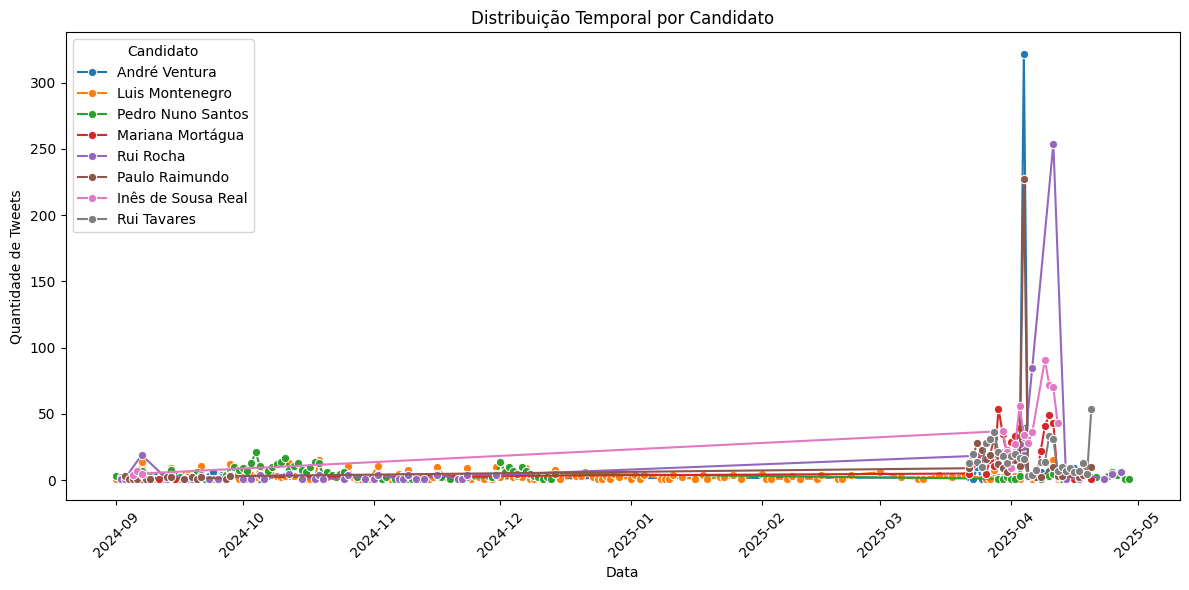

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

# Convertendo a coluna 'datetime' para o tipo datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Criando uma nova coluna para agrupar por data
df['date_only'] = df['datetime'].dt.date

# Agrupando os dados por data e candidato
grouped = df.groupby(['date_only', 'candidate']).size().reset_index(name='count')

# Plotando o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='date_only', y='count', hue='candidate', marker='o')
plt.title('Distribuição Temporal por Candidato')
plt.xlabel('Data')
plt.ylabel('Quantidade de Tweets')
plt.xticks(rotation=45)
plt.legend(title='Candidato')
plt.tight_layout()
plt.show()

Verificar a distribuição das datas dos tweets

In [10]:
from datetime import datetime, timedelta

# Obtendo a data do último tweet no dataframe
ultima_data = df['datetime'].max()

# Calculando a data de um mês atrás
um_mes_atras = ultima_data - timedelta(days=30)

# Filtrando os tweets do último mês
tweets_ultimo_mes = df[df['datetime'] >= um_mes_atras]

# Calculando a proporção de tweets no último mês
proporcao = len(tweets_ultimo_mes) / len(df)

# Verificando se a proporção é maior ou igual a 70% ou 80%
print(f"Proporção de tweets no último mês: {proporcao:.2%}")
if proporcao >= 0.8:
    print("Mais de 80% dos tweets estão no último mês.")
elif proporcao >= 0.7:
    print("Mais de 70% dos tweets estão no último mês.")
else:
    print("Menos de 70% dos tweets estão no último mês.")

TypeError: unsupported operand type(s) for -: 'str' and 'datetime.timedelta'

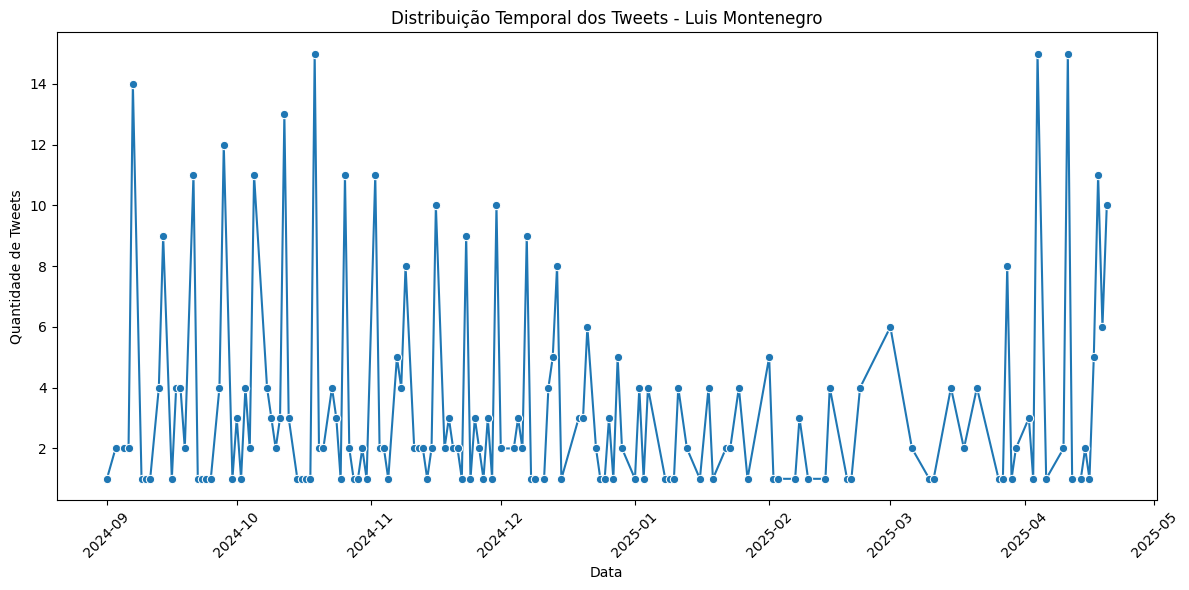

In [ ]:
# Filtrando os dados para o candidato "Luis Montenegro"
luis_montenegro_data = grouped[grouped['candidate'] == 'Luis Montenegro']

# Plotando o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=luis_montenegro_data, x='date_only', y='count', marker='o')
plt.title('Distribuição Temporal dos Tweets - Luis Montenegro')
plt.xlabel('Data')
plt.ylabel('Quantidade de Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Média de likes por candidato

C:\Users\ferol\AppData\Local\Temp\ipykernel_404\1597977414.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=likes_media, x='candidate', y='likes', palette='viridis')


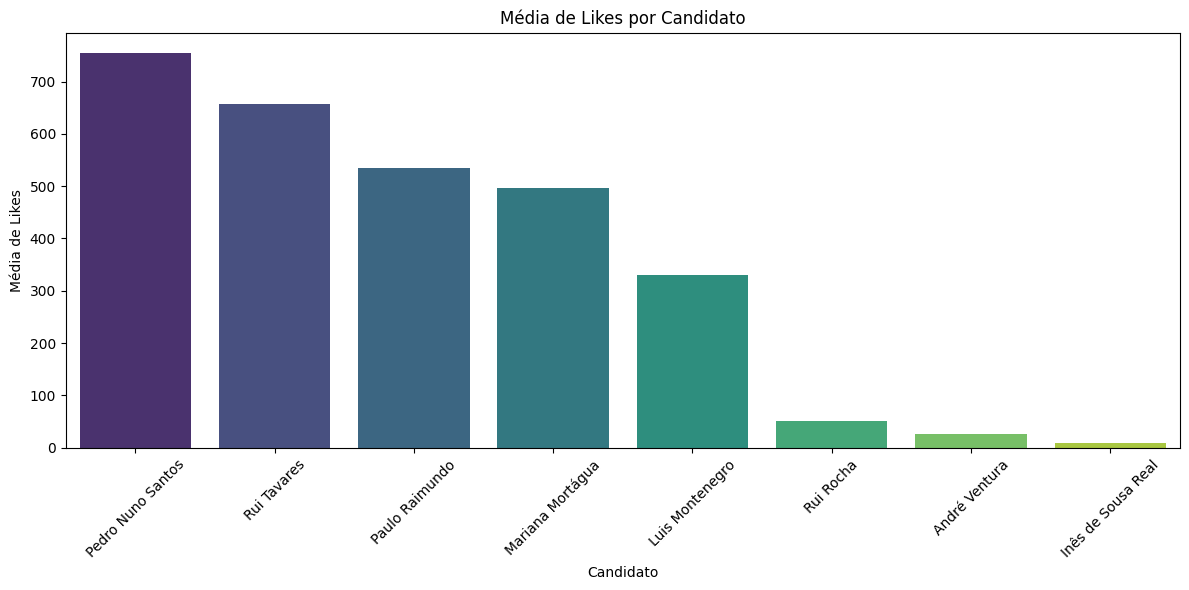

In [7]:
# Calculando a média de likes por candidato
likes_media = df.groupby('candidate')['likes'].mean().reset_index()

# Ordenando os candidatos pela média de likes
likes_media = likes_media.sort_values(by='likes', ascending=False)

# Plotando o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=likes_media, x='candidate', y='likes', palette='viridis')
plt.title('Média de Likes por Candidato')
plt.xlabel('Candidato')
plt.ylabel('Média de Likes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

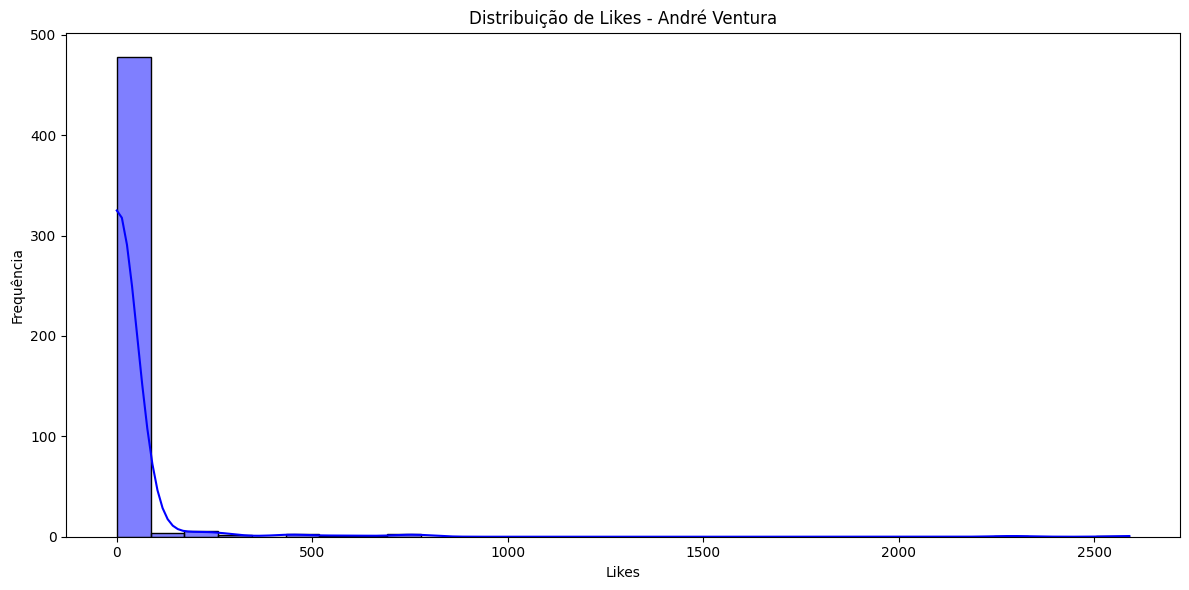

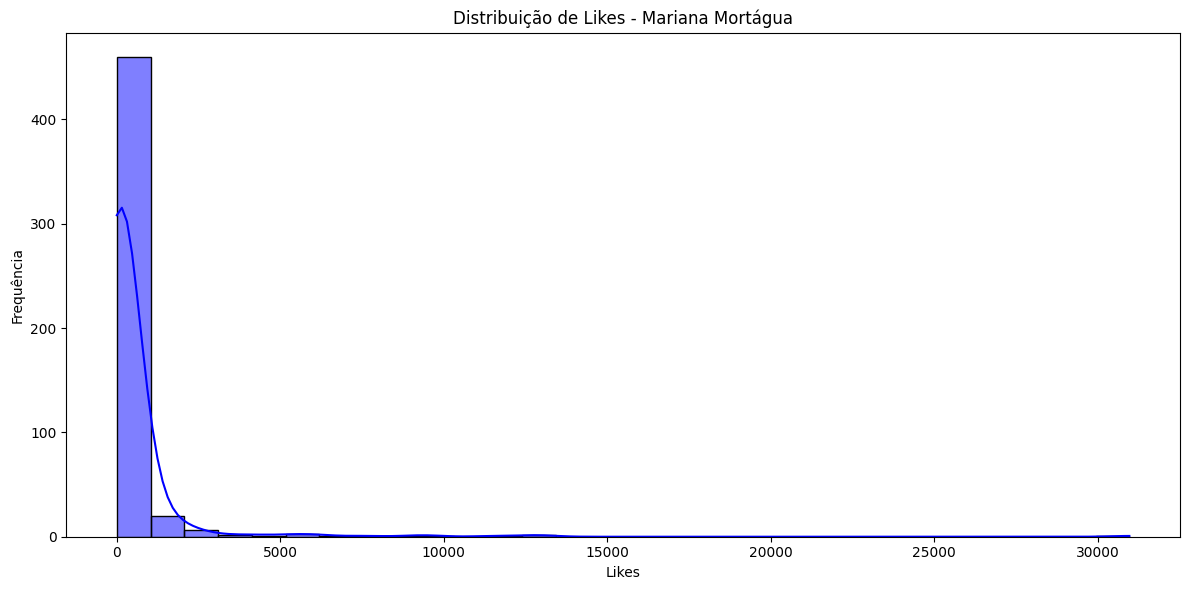

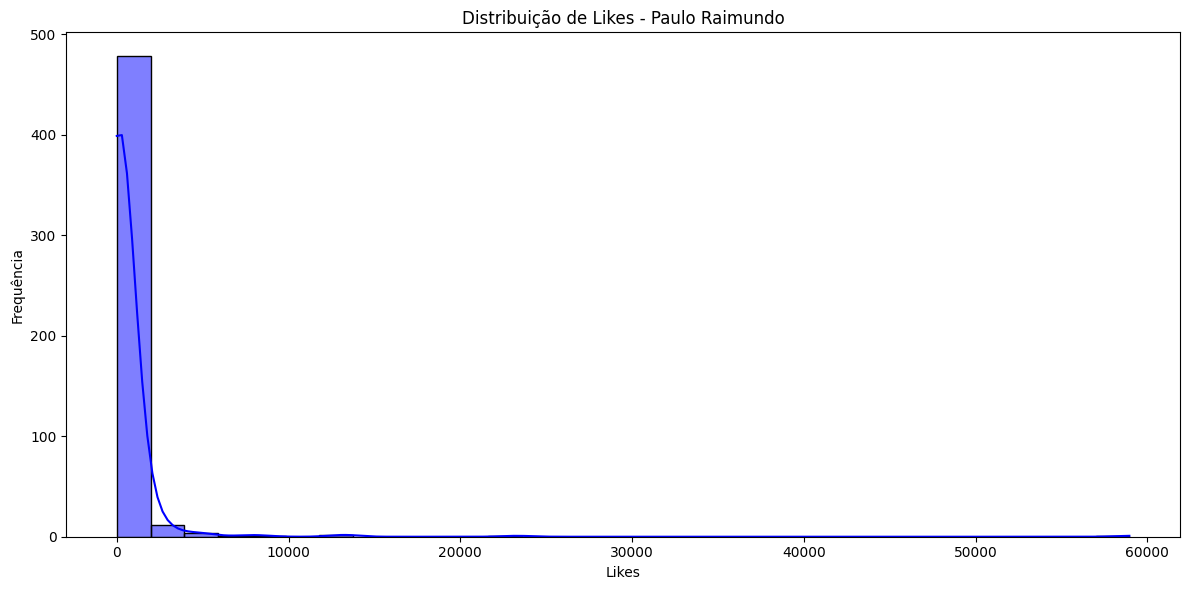

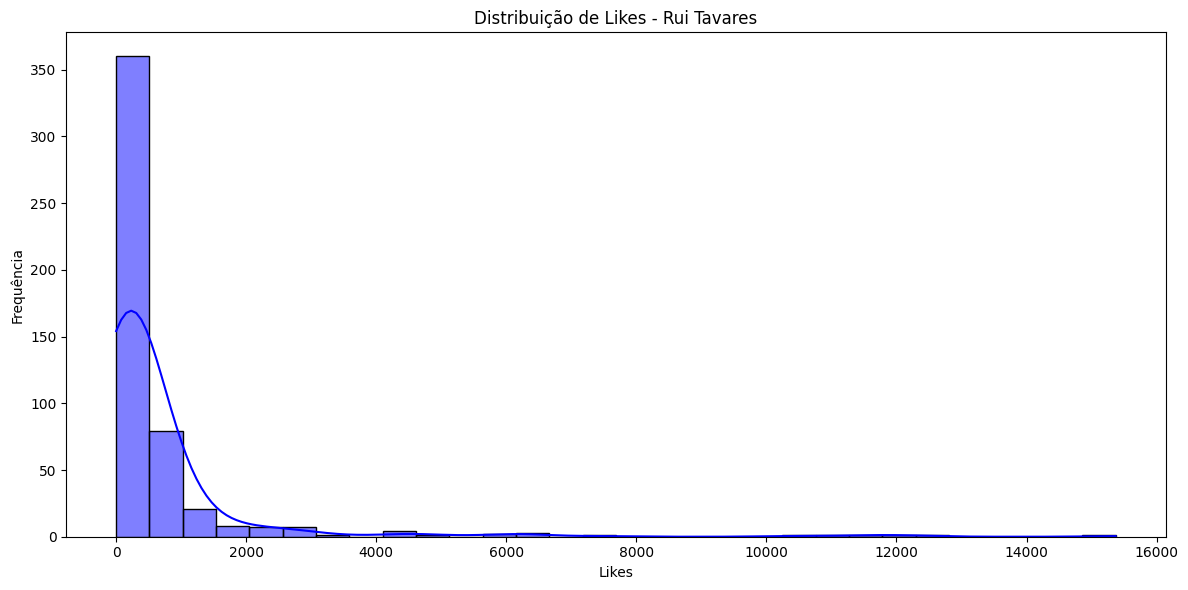

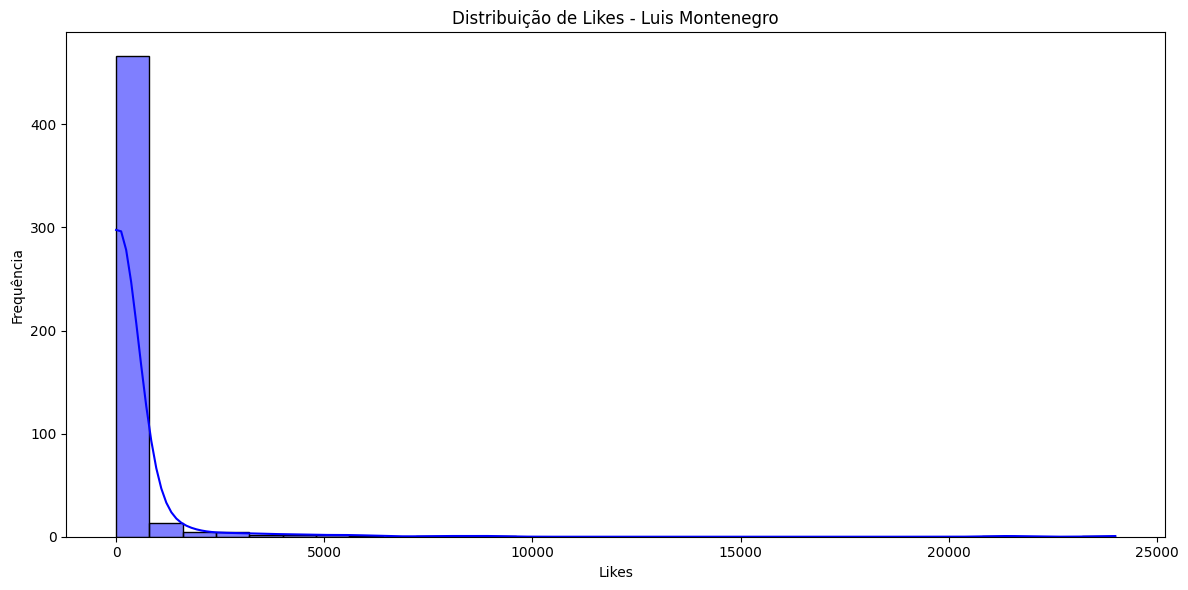

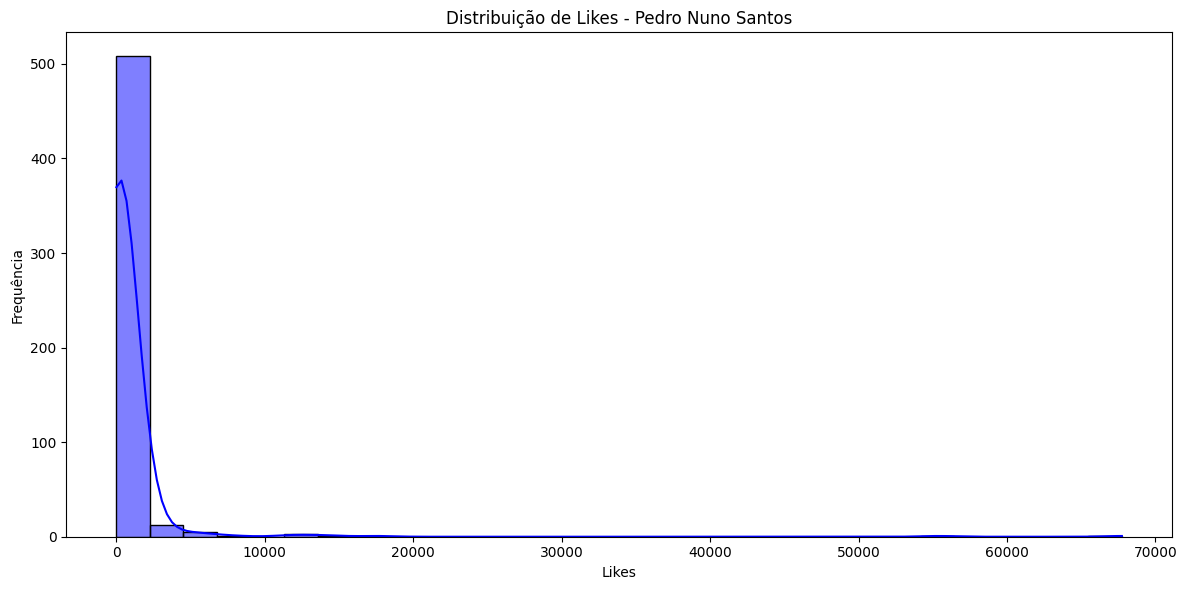

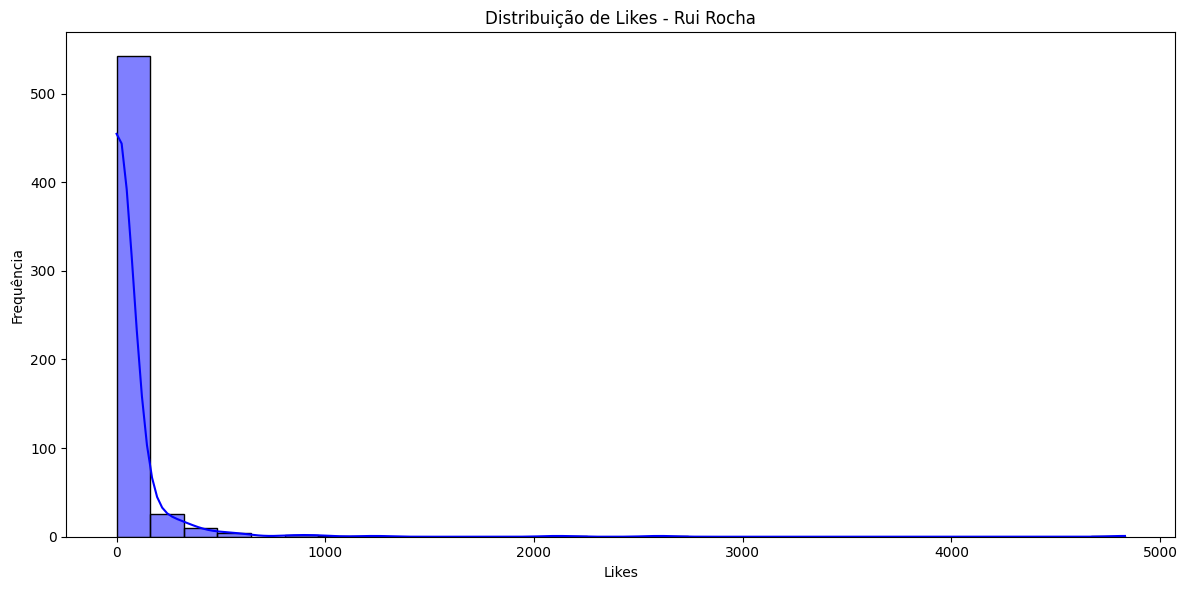

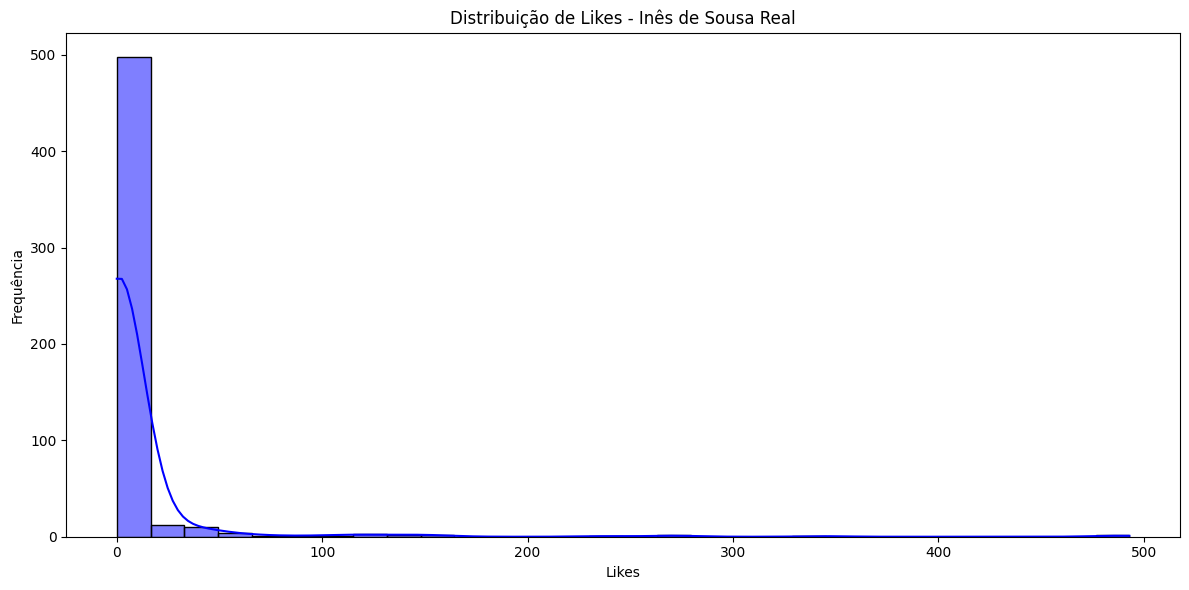

In [8]:
# Obtendo a lista de candidatos únicos
candidatos = df['candidate'].unique()

# Criando gráficos individuais para cada candidato
for candidato in candidatos:
    # Filtrando os dados para o candidato atual
    candidato_data = df[df['candidate'] == candidato]
    
    # Plotando o gráfico
    plt.figure(figsize=(12, 6))
    sns.histplot(candidato_data['likes'], bins=30, kde=True, color='blue')
    plt.title(f'Distribuição de Likes - {candidato}')
    plt.xlabel('Likes')
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()


In [14]:
# Contando a quantidade de tweets por candidato
tweets_por_candidato = df['candidate'].value_counts().reset_index()
tweets_por_candidato.columns = ['candidate', 'tweet_count']

# Exibindo o resultado
print(tweets_por_candidato)

            candidate  tweet_count
0           Rui Rocha          589
1  Inês de Sousa Real          540
2   Pedro Nuno Santos          533
3       André Ventura          500
4    Mariana Mortágua          500
5      Paulo Raimundo          500
6         Rui Tavares          500
7     Luis Montenegro          500


## Pré-processamento de dados

### Remoção de Tweets em Idiomas Diferentes do Português

Nesta etapa, realizamos a identificação do idioma de cada tweet utilizando a biblioteca `langdetect`. Em seguida, filtramos e removemos os tweets que não estão em português, garantindo que a análise seja focada apenas nos textos relevantes ao contexto linguístico desejado. Essa limpeza é essencial para evitar ruídos nos resultados das análises posteriores.

In [ ]:
from langdetect import detect

# Função para verificar o idioma do texto
def verificar_idioma(texto):
    try:
        return detect(texto)
    except:
        return None

# Adicionando uma coluna com o idioma detectado
df['idioma'] = df['text'].apply(verificar_idioma)

# Filtrando os tweets que não estão em português
tweets_nao_portugues = df[df['idioma'] != 'pt']
# Exibindo os tweets que não estão em português
print(tweets_nao_portugues[['text', 'idioma']])

In [ ]:
# Removendo os tweets que não estão em português
df = df[df['idioma'] == 'pt']
df.to_csv('tweets.csv', index=False)

### Análise Sentimental dos Tweets

O código apresentado realiza uma análise sentimental dos tweets presentes no dataframe `df`. Para isso, utiliza um modelo pré-treinado de análise de sentimentos, que é carregado através da biblioteca `tweetnlp`. A análise sentimental classifica cada tweet em categorias como "positivo", "neutro" ou "negativo". 

Os passos principais incluem:
1. **Carregamento do Modelo**: O modelo de análise sentimental é carregado com suporte para múltiplos idiomas.
2. **Aplicação do Modelo**: A função `predict` do modelo é aplicada a cada texto de tweet para determinar o sentimento correspondente.
3. **Armazenamento dos Resultados**: Os resultados da análise são armazenados em uma nova coluna chamada `sentiment` no dataframe `df`.
4. **Visualização**: Os primeiros resultados são exibidos para validação.

Essa etapa é essencial para entender a percepção pública em relação aos candidatos e temas discutidos nos tweets. A análise sentimental pode ser utilizada para identificar tendências e padrões de opinião. 

In [66]:
import tweetnlp

#executar como administrador
model_sentiment = tweetnlp.load_model('sentiment', multilingual=True) 

c:\Users\ferol\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\auto\configuration_auto.py:1099: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
c:\Users\ferol\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\auto\tokenization_auto.py:898: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
c:\Users\ferol\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\auto\auto_factory.py:476: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


In [85]:
# Aplicando a análise sentimental em todos os tweets
df['sentiment'] = df['text'].apply(lambda x: model_sentiment.predict(x)['label'] if pd.notnull(x) else None)

# Exibindo os primeiros resultados
df[['text', 'sentiment']].head()

C:\Users\ferol\AppData\Local\Temp\ipykernel_34944\4091839560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['text'].apply(lambda x: model_sentiment.predict(x)['label'] if pd.notnull(x) else None)


,text,sentiment
0,"Hoje, durante a tarde, acompanhamos o nosso p...",neutral
1,Existe futuro em Portugal! \n#chega\n#salvarpo...,positive
2,Ontem estivemos no mercado de Benfica a distri...,positive
3,"Hoje, durante a tarde, acompanhamos o nosso p...",neutral
4,"Exactamente, e #PedroNunoSantos #PS jogou mal,...",negative


In [105]:
# Calculando a dispersão (amplitude de tempo) para cada candidato
# Calculando a dispersão (amplitude de tempo) para cada candidato
dispersao_tempo = df.groupby('candidate')['datetime'].agg(lambda x: x.max() - x.min())

# Exibindo os resultados
print("Dispersão do datetime por candidato:")
print(dispersao_tempo)

# Verificando a quantidade dessa dispersão em dias
dispersao_em_dias = dispersao_tempo.dt.days
print("\nDispersão em dias por candidato:")
print(dispersao_em_dias)


Dispersão do datetime por candidato:
candidate
André Ventura       230 days 23:20:39
Luis Montenegro     231 days 13:00:59
Mariana Mortágua    229 days 11:58:10
Paulo Raimundo      229 days 13:05:58
Pedro Nuno Santos   238 days 22:54:35
Rui Rocha           237 days 04:29:41
Rui Tavares          29 days 23:38:03
Name: datetime, dtype: timedelta64[ns]

Dispersão em dias por candidato:
candidate
André Ventura        230
Luis Montenegro      231
Mariana Mortágua     229
Paulo Raimundo       229
Pedro Nuno Santos    238
Rui Rocha            237
Rui Tavares           29
Name: datetime, dtype: int64


## Criar features e modelação

In [ ]:
df_analise = pd.read_csv('tweets.csv')

C:\Users\ferol\AppData\Local\Temp\ipykernel_34944\1252575751.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_polaridade, x='candidate', y='polaridade', palette='coolwarm')


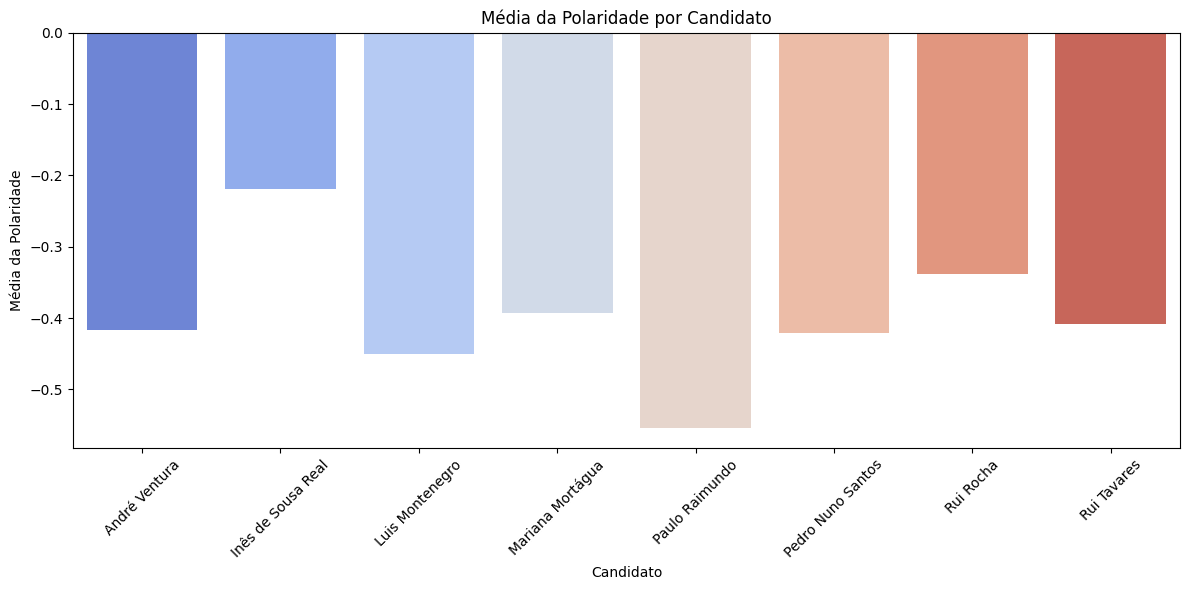

In [88]:
# Mapeando os valores de polaridade
polaridade_map = {'positive': 1, 'neutral': 0, 'negative': -1}
df_analise['polaridade'] = df_analise['sentiment'].map(polaridade_map)

# Calculando a média da polaridade por candidato
media_polaridade = df_analise.groupby('candidate')['polaridade'].mean().reset_index()

# Plotando o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=media_polaridade, x='candidate', y='polaridade', palette='coolwarm')
plt.title('Média da Polaridade por Candidato')
plt.xlabel('Candidato')
plt.ylabel('Média da Polaridade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [98]:
# Calcular a quantidade total de palavras por candidato
word_count_total = {candidato: sum(count.values()) for candidato, count in word_count.items()}

# Exibir a quantidade total de palavras para cada candidato
for candidato, total in word_count_total.items():
    print(f"Quantidade total de palavras para {candidato}: {total}")


Quantidade total de palavras para André Ventura: 10517
Quantidade total de palavras para Mariana Mortágua: 15285
Quantidade total de palavras para Paulo Raimundo: 14783
Quantidade total de palavras para Rui Tavares: 16770
Quantidade total de palavras para Luis Montenegro: 13793
Quantidade total de palavras para Pedro Nuno Santos: 15902
Quantidade total de palavras para Rui Rocha: 12563


In [ ]:
# Mapeando os valores de polaridade
polaridade_map = {'positive': 1, 'neutral': 0, 'negative': -1}
df_analise['polaridade'] = df_analise['sentiment'].map(polaridade_map)

# Calculando a média da polaridade por candidato
media_polaridade = df.groupby('candidate')['polaridade'].mean().reset_index()

# Plotando o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=media_polaridade, x='candidate', y='polaridade', palette='coolwarm')
plt.title('Média da Polaridade por Candidato')
plt.xlabel('Candidato')
plt.ylabel('Média da Polaridade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\ferol\AppData\Local\Temp\ipykernel_34944\1252575751.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_polaridade, x='candidate', y='polaridade', palette='coolwarm')


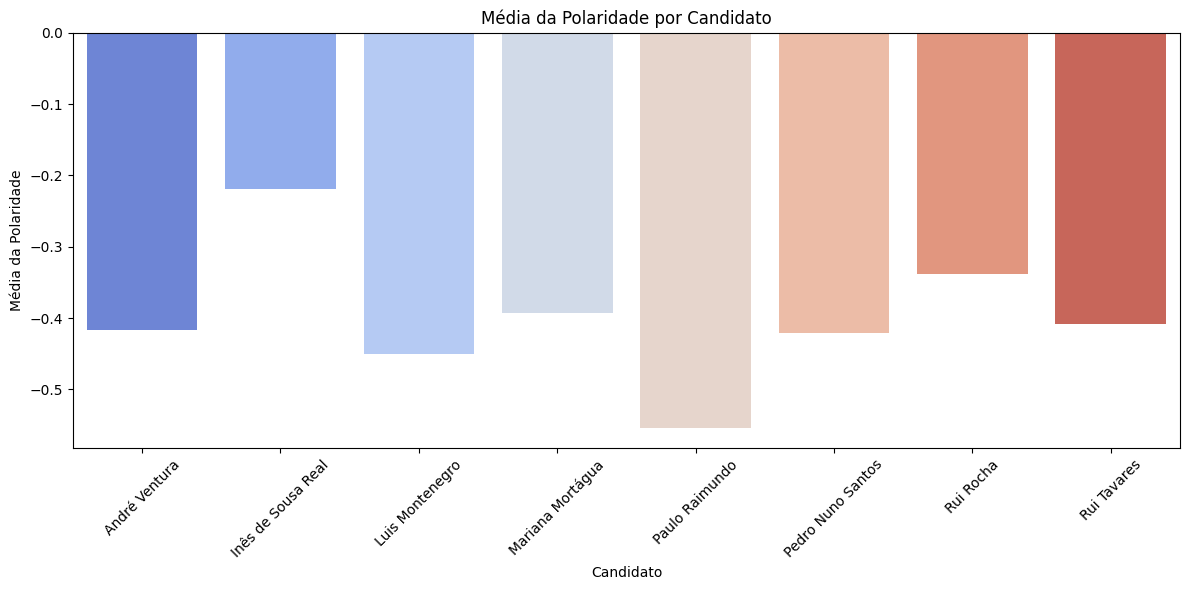

In [90]:
# Mapeando os valores de polaridade
polaridade_map = {'positive': 1, 'neutral': 0, 'negative': -1}
df_analise['polaridade'] = df_analise['sentiment'].map(polaridade_map)

# Calculando a média da polaridade por candidato
media_polaridade = df_analise.groupby('candidate')['polaridade'].mean().reset_index()

# Plotando o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=media_polaridade, x='candidate', y='polaridade', palette='coolwarm')
plt.title('Média da Polaridade por Candidato')
plt.xlabel('Candidato')
plt.ylabel('Média da Polaridade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [104]:
# Calculando engajamento médio por tweet
tweets_por_candidato['avg_engagement'] = (
    df_analise.groupby('candidate')[['likes', 'retweets', 'replies', 'bookmarks']].sum().sum(axis=1) / tweets_por_candidato['tweet_count']
)

# Calculando proporções de sentimentos
sentiment_counts = df_analise.groupby(['candidate', 'sentiment']).size().unstack(fill_value=0)
sentiment_counts['total'] = sentiment_counts.sum(axis=1)
sentiment_counts['positive_ratio'] = sentiment_counts['positive'] / sentiment_counts['total']
sentiment_counts['negative_ratio'] = sentiment_counts['negative'] / sentiment_counts['total']
sentiment_counts['neutral_ratio'] = sentiment_counts['neutral'] / sentiment_counts['total']

# Calculando variância de likes por candidato
likes_variance = df_analise.groupby('candidate')['likes'].var()

# Adicionando as novas features ao dataframe
# Garantindo que todas as colunas tenham o mesmo comprimento
# Ensure all candidates are present in the dataframes/series being reindexed
features_df = pd.DataFrame({
    'candidate': tweets_por_candidato['candidate'],
    'tweet_count': tweets_por_candidato['tweet_count'],
    'avg_polarity': media_polaridade.set_index('candidate').reindex(tweets_por_candidato['candidate'], fill_value=0)['polaridade'].values,
    'avg_likes': likes_media.set_index('candidate').reindex(tweets_por_candidato['candidate'], fill_value=0)['likes'].values,
    'temporal_dispersion_days': dispersao_em_dias.reindex(tweets_por_candidato['candidate'], fill_value=0).values,
    'total_word_count': [word_count_total.get(c, 0) for c in tweets_por_candidato['candidate']],
    'temporal_variance': variancia_temporal.reindex(tweets_por_candidato['candidate'], fill_value=0).values,
    'tweets_last_month_ratio': [proporcao] * len(tweets_por_candidato),
    'avg_engagement': tweets_por_candidato['avg_engagement'],
    'positive_ratio': sentiment_counts.reindex(tweets_por_candidato['candidate'], fill_value=0)['positive_ratio'].values,
    'negative_ratio': sentiment_counts.reindex(tweets_por_candidato['candidate'], fill_value=0)['negative_ratio'].values,
    'neutral_ratio': sentiment_counts.reindex(tweets_por_candidato['candidate'], fill_value=0)['neutral_ratio'].values,
    'likes_variance': likes_variance.reindex(tweets_por_candidato['candidate'], fill_value=0).values
})

# Salvando o dataframe em um arquivo CSV
features_df.to_csv('previsao_eleitoral_features.csv', index=False)

print("Arquivo 'previsao_eleitoral_features.csv' criado com sucesso!")

Arquivo 'previsao_eleitoral_features.csv' criado com sucesso!
